# Likelihood of E-Signing a Loan based on Financial History
- We are going to asses the 'quality' of leads our company receives from market place regarding the loan request.
- We'll predict the likelihood of the customer actually going through the whole process of completing the E-signing process.

## Business Challenge

- Here we are working for Fintech company.
- We are given the task of whether or not to let the customer complete the onbaording E-signing process(e_signed).
- The funnel of the whole process is as follows - The customers will come to the company portal and provide their information
- After deciding to accept the lead as to whether the customer will complete the whole process of compeleting till the E-sgining screen.
- Our job is to predict that the lead is a 'quality' one or not i.e whether what is the likelihood of the applicant to actually complete the whole process.

## DATA
- The data we are going to recive is not going to be the raw data from the applicant.
- We will recive the data that is been passed through an algorithm that genreates risk scores on the basis of the information provided by the applicant.
- Our job is to leverage these risk scores and give our predictions on the likelihood of the applicant to finsih till the E-signing process.
- We have the following columns in our dataset:
    - entry_id : That is the entry ID for our applicant which is unique for every applicant.
    - age : This will be the age of our applicant.
    - pay_schedule : This is how often how our applicant is paid.
    - home_owner : Whether the user owns a house 0 or 1.
    - income : monthly income of our applicant.
    - years_employed : years the applicant is employed.
    - current_address_year : Number of years the applicant has stayed at their current address.
    - personel_account_m : Number of months the person had the account it is correlated with nes column.
    - personel_account_y : Number of years the person had the account i.e  months 2 & years 3 then person has the account for 3 years and 2 months.
    - has_debt : If the applicant has a prior dent 0 or 1.
    - risk_score, _2,_3,_4,_5: Predict whether the user will complete the whole process of E-Signing the loan and Payback which are based on different factors.
    - ext_quality_score, _2 : The are external quality score based on factors.
    - inquiries_last_month : how many inquiries user has in last month.
    - e-signed : If the applicant e-signed the lan or not. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Cleaning our data a bit before actually applying any models on them
dataset = pd.read_csv('Financial-Data.csv')
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [3]:
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [6]:
# Now we'll be creating a Histograms for our given dataset to find insights

dataset2 = dataset.drop(columns= ['entry_id', 'pay_schedule', 'e_signed'])

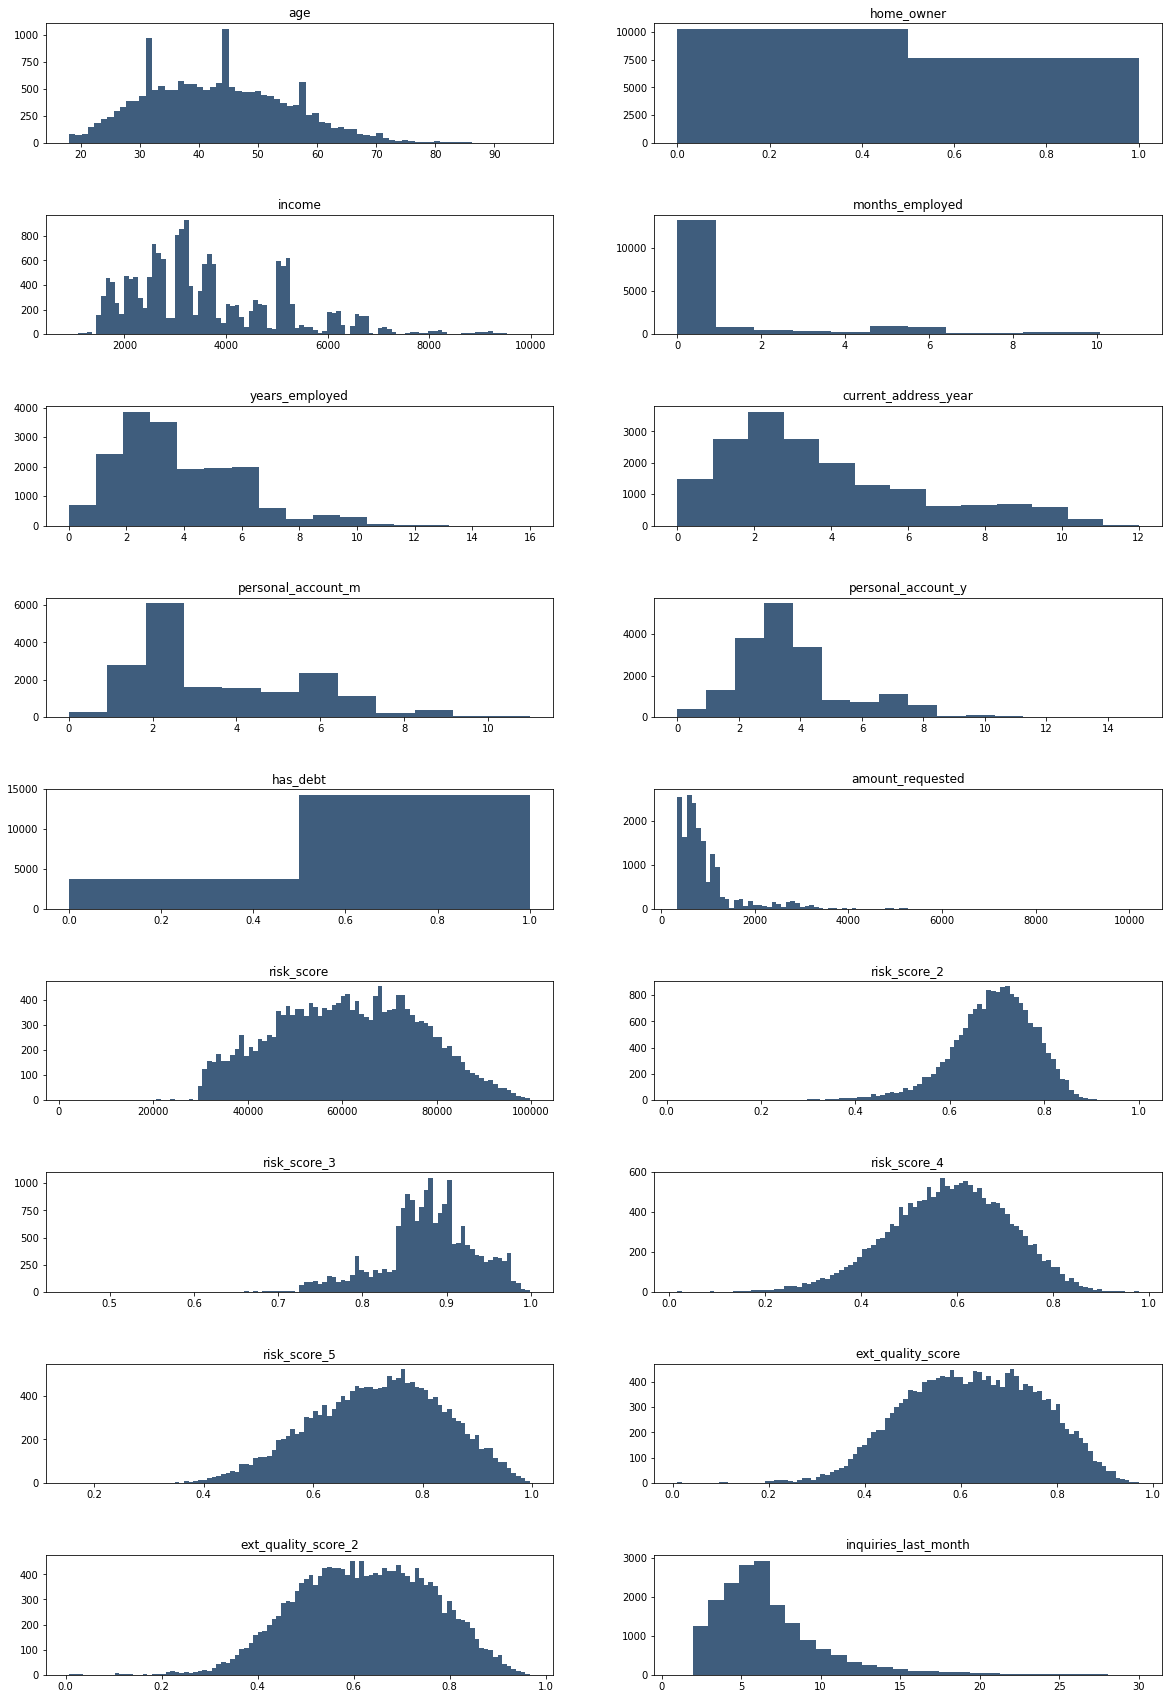

In [13]:
fig = plt.figure(figsize=(20,48))
plt.title("Histograms for our Dataset", fontsize= 20)
for i in range(dataset2.shape[1]):
    plt.subplot(14,2,i+1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(dataset2.iloc[:,i], bins = vals, color = "#3f5d7d")
plt.subplots_adjust(hspace= 0.6)

- Now to take the insights from the histograms
- We'll move forward with finding the correalation between every attribute in our dataset to our response attribute.

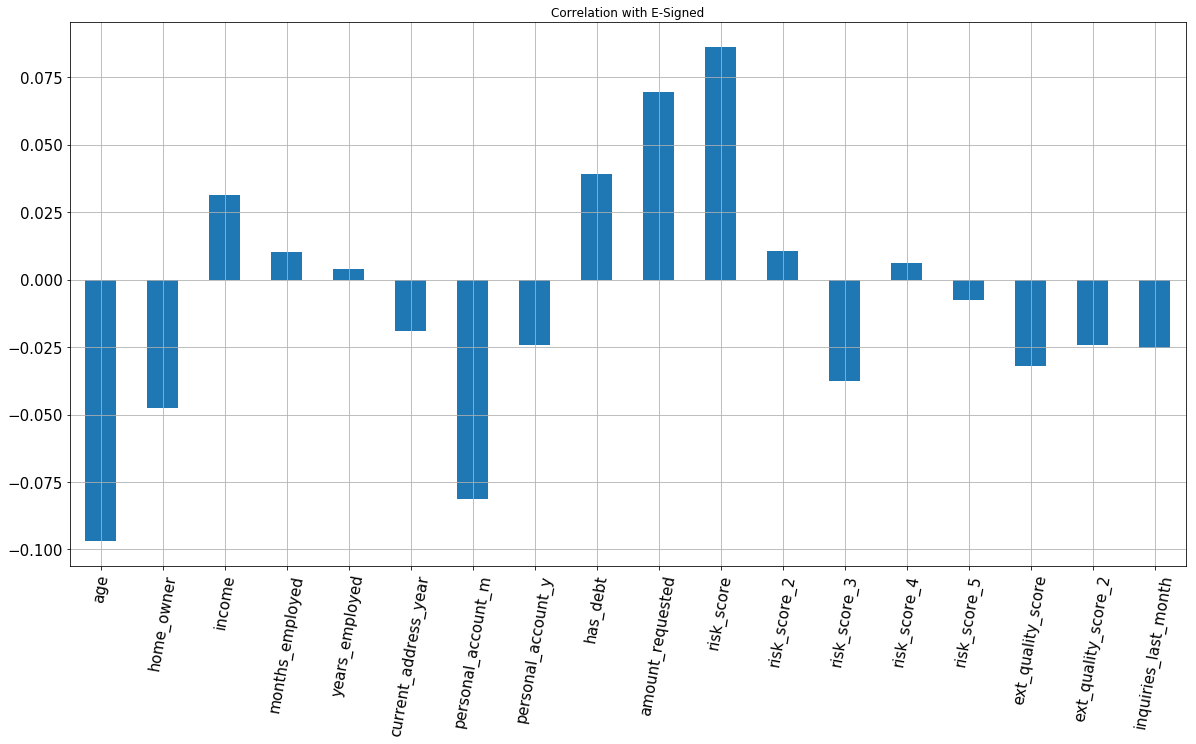

In [17]:
dataset2.corrwith(dataset.e_signed).plot.bar(figsize = (20,10), 
                                             title = 'Correlation with E-Signed', 
                                             fontsize =15, 
                                             rot = 80,
                                             grid = True)

- Building a correlation matrix to to check how the relation of the attribute with each other

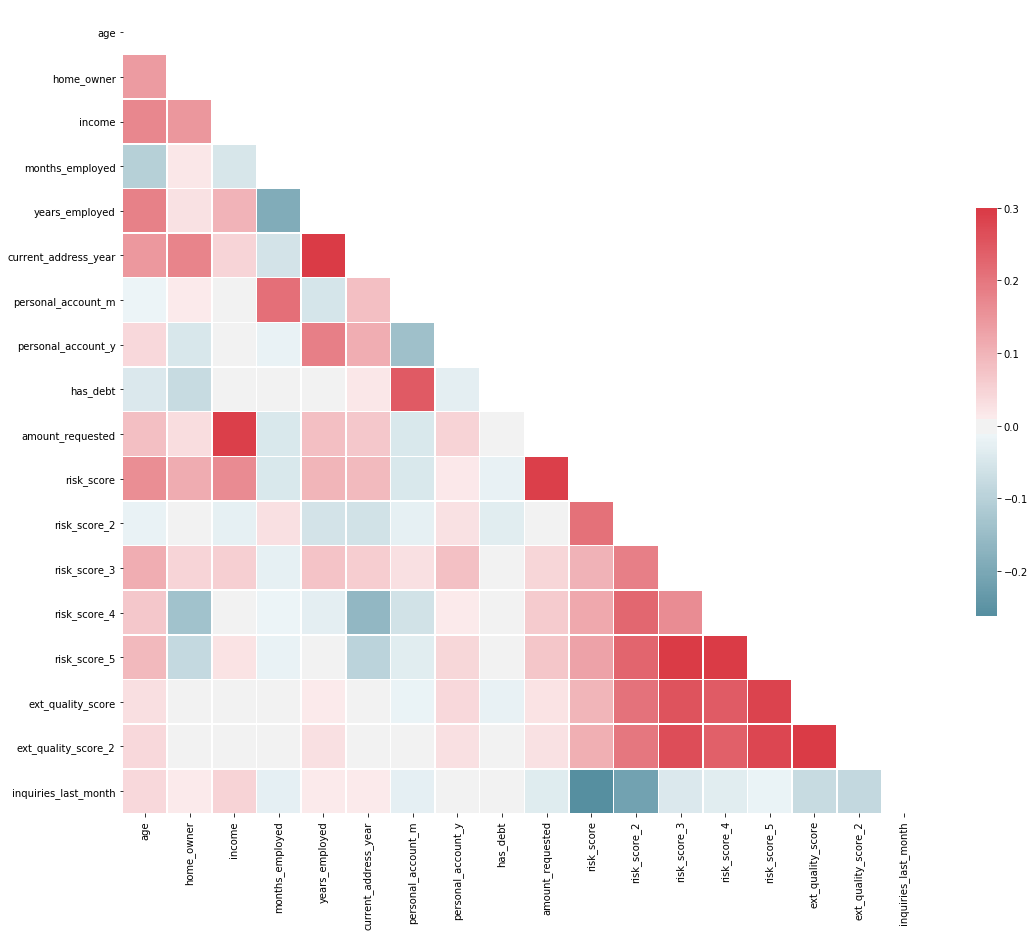

In [37]:
corr = dataset2.corr()

# Generate the mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Setup the matplotlib figure
f, ax = plt.subplots(figsize=(18,15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap= True)

# Draw the heatmap with mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3 , center=0, square=True, linewidths=0.5, cbar_kws={"shrink" : 0.5})

In [38]:
import random
random.seed(100)

In [39]:
# We removed the individual months and years and converted it to single attribute of total months
dataset = dataset.drop(columns=['months_employed'])
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))
dataset[['personal_account_m','personal_account_y', 'personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [40]:
dataset = dataset.drop(columns=['personal_account_m','personal_account_y'])

In [42]:
# Now we will preprocess our data with One Hot Encoding and getting our dummy variables
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [43]:
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

In [44]:
# Removing Extra columns for train_test_split
response = dataset['e_signed']
dataset = dataset.drop(columns=['e_signed'])

In [46]:
# Splitting dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset, response, test_size = 0.2, random_state = 0)

In [47]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

/Users/parthkotecha/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/parthkotecha/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/parthkotecha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [49]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      1654
           1       0.65      0.69      0.67      1928

   micro avg       0.63      0.63      0.63      3582
   macro avg       0.63      0.63      0.63      3582
weighted avg       0.63      0.63      0.63      3582



In [52]:
# Applying Parameter tuning using Grid Search
import time
parameters = {'max_depth' : [3, None],
             'max_features' : [1,5,10],
             'min_samples_split' : [2,5,10],
             'min_samples_leaf': [1,5,10],
             'bootstrap':[True, False],
             'criterion': ['entropy','gini']}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator= classifier, 
                          param_grid=parameters,
                          scoring= 'accuracy',
                         cv =10)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds"%(t1 - t0))

Took 9871.81 seconds


In [ ]:
print(f'Best Accuracy : {rf_best_accuracy}')
print(f'Best Parameters : {rf_best_parameters}')
y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

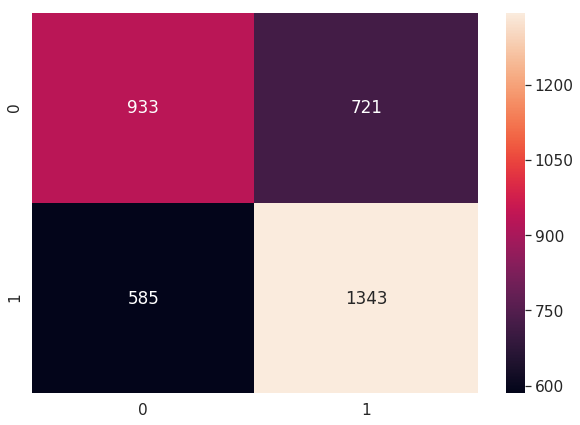

In [54]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')